In [155]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [4]:
monthly_temp_anamoly=pd.read_csv('Air_Temperature.csv', names=['Year','Month','Anamoly'])

In [5]:
monthly_temp_anamoly.head()

,Year,Month,Anamoly
0,1850,1,-0.779
1,1850,2,-0.260
2,1850,3,-0.401
3,1850,4,-0.699
4,1850,5,-0.687


In [6]:
#Monthly absolute temperatures
abs_temp=[12.28,12.50,13.12,14.04,15.02,15.73,16.00,15.83,15.24,14.30,13.29,12.55]
abs_temp

[12.28,
 12.5,
 13.12,
 14.04,
 15.02,
 15.73,
 16.0,
 15.83,
 15.24,
 14.3,
 13.29,
 12.55]

In [7]:
j=0
for i in monthly_temp_anamoly.index:
        monthly_temp_anamoly.at[i,'Temperature']=monthly_temp_anamoly.at[i,'Anamoly']+abs_temp[j]
        j=j+1
        if j==11:
            j=0                               

In [8]:
monthly_temp_anamoly['Date'] = pd.to_datetime(monthly_temp_anamoly[['Year', 'Month']].assign(Day=1))

In [9]:
monthly_temp_anamoly.head(12)

,Year,Month,Anamoly,Temperature,Date
0,1850,1,-0.779,11.501,1850-01-01
1,1850,2,-0.260,12.240,1850-02-01
2,1850,3,-0.401,12.719,1850-03-01
3,1850,4,-0.699,13.341,1850-04-01
4,1850,5,-0.687,14.333,1850-05-01
5,1850,6,-0.401,15.329,1850-06-01
6,1850,7,-0.258,15.742,1850-07-01
7,1850,8,-0.236,15.594,1850-08-01
8,1850,9,-0.501,14.739,1850-09-01
9,1850,10,-0.662,13.638,1850-10-01


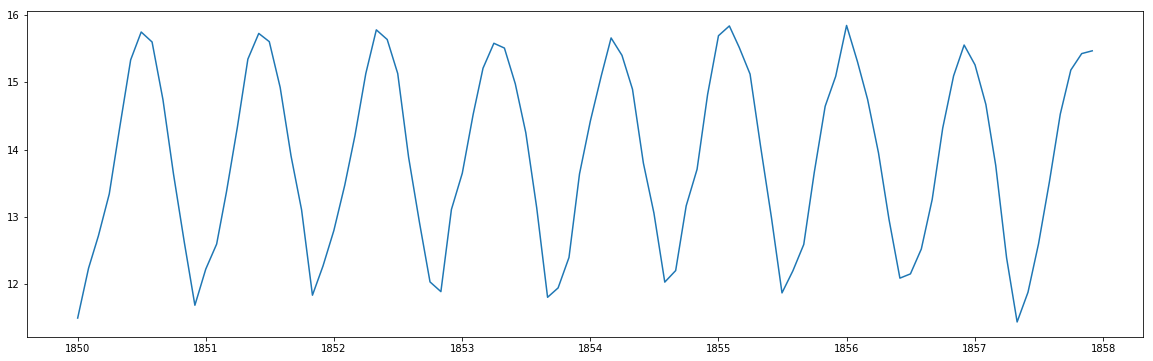

In [10]:
plt.figure(figsize=(20,6))
plt.plot(monthly_temp_anamoly['Date'].head(96),monthly_temp_anamoly['Temperature'].head(96));

In [113]:
avg_temp=monthly_temp_anamoly.groupby('Year',as_index=False).mean()
avg_temp=avg_temp.drop(['Month'],axis=1)
avg_temp.head()

,Year,Anamoly,Temperature
0,1850,-0.511917,13.623917
1,1851,-0.385083,13.769083
2,1852,-0.374917,13.830917
3,1853,-0.398500,13.884000
4,1854,-0.343917,14.020250


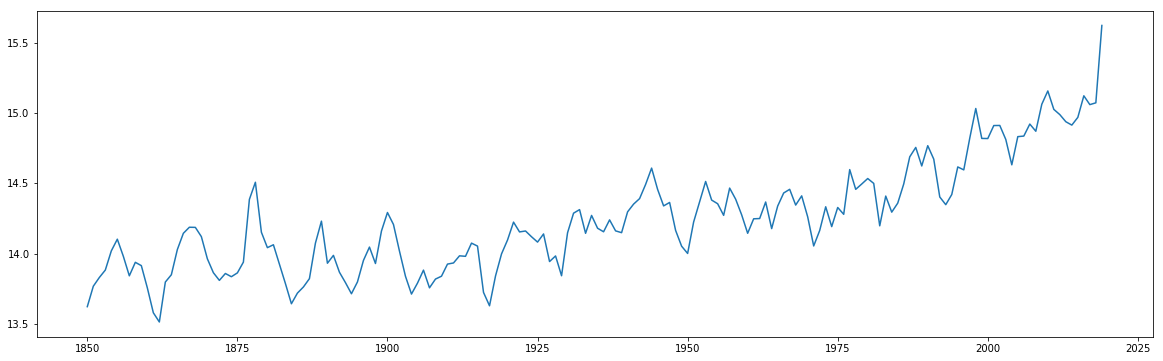

In [114]:
plt.figure(figsize=(20,6))
plt.plot(avg_temp['Year'],avg_temp['Temperature']);

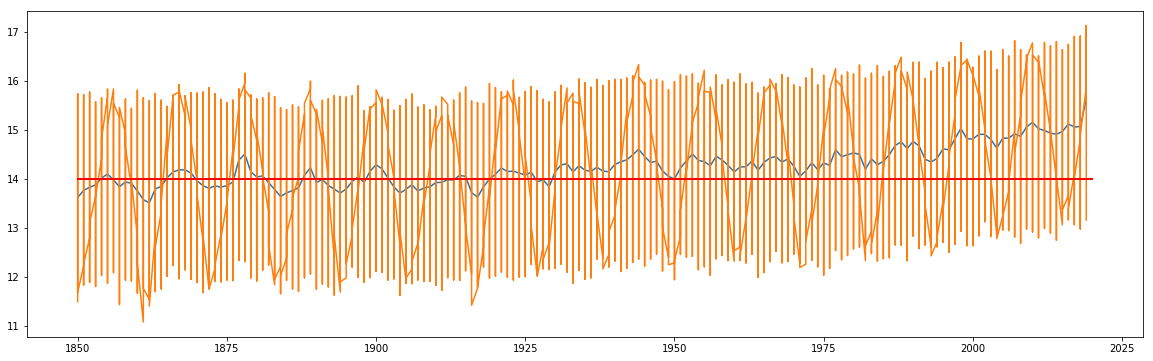

In [13]:
plt.figure(figsize=(20,6))
plt.plot(avg_temp['Year'],avg_temp['Temperature']);
plt.plot(monthly_temp_anamoly['Year'],monthly_temp_anamoly['Temperature']);
plt.plot([1850,2020], [14,14], 'Red', lw=2);

In [45]:
co2=pd.read_csv('co2.csv')

In [46]:
co2=co2.replace(-99.99,np.nan)
co2['Co2_interpolated']=co2['Co2 (ppm)'].interpolate(method='polynomial', order=2)
co2['Co2_interpolated']=round(co2['Co2_interpolated'],2)

In [47]:
co2.loc[co2['Co2 (ppm)'].isna()]

,Year,Month,Co2 (ppm),Co2_interpolated
49,1964,2,NaN,320.66
50,1964,3,NaN,321.53
51,1964,4,NaN,322.09
191,1975,12,NaN,330.47
291,1984,4,NaN,346.81


In [49]:
co2['Date'] = pd.to_datetime(co2[['Year', 'Month']].assign(Day=1))
co2.head()

,Year,Month,Co2 (ppm),Co2_interpolated,Date
0,1960,1,316.43,316.43,1960-01-01
1,1960,2,316.97,316.97,1960-02-01
2,1960,3,317.58,317.58,1960-03-01
3,1960,4,319.02,319.02,1960-04-01
4,1960,5,320.03,320.03,1960-05-01


In [84]:
n2o=pd.read_csv('n20.csv')
ch4=pd.read_csv('ch4.csv')

In [115]:
greenhouse_gas=pd.merge(co2_temp,n2o, on='Year', how='left')
greenhouse_gas=pd.merge(greenhouse_gas,ch4, on='Year', how='left')
greenhouse_gas.head(8)

,Year,Month,Co2 (ppm),Co2_interpolated,Entity_x,Code_x,Nitrous Oxide,Entity_y,Code_y,Methane
0,1960,6.5,316.907500,316.907500,World,OWID_WRL,291.4,World,OWID_WRL,1262.97
1,1961,6.5,317.637500,317.637500,NaN,NaN,NaN,NaN,NaN,NaN
2,1962,6.5,318.450833,318.450833,NaN,NaN,NaN,NaN,NaN,NaN
3,1963,6.5,318.994167,318.994167,NaN,NaN,NaN,NaN,NaN,NaN
4,1964,6.5,319.204444,319.760000,NaN,NaN,NaN,NaN,NaN,NaN
5,1965,6.5,320.044167,320.044167,World,OWID_WRL,292.9,World,OWID_WRL,1328.47
6,1966,6.5,321.383333,321.383333,NaN,NaN,NaN,NaN,NaN,NaN
7,1967,6.5,322.157500,322.157500,NaN,NaN,NaN,NaN,NaN,NaN


In [116]:
greenhouse_gas['n2o_interpolated']=greenhouse_gas['Nitrous Oxide'].interpolate(method='polynomial', order=2)
greenhouse_gas['n2o_interpolated']=round(greenhouse_gas['n2o_interpolated'],2)
greenhouse_gas['n2o_interpolated'].isna().sum()

0

In [117]:
greenhouse_gas['ch4_interpolated']=greenhouse_gas['Methane'].interpolate(method='polynomial', order=2)
greenhouse_gas['ch4_interpolated']=round(greenhouse_gas['ch4_interpolated'],2)
greenhouse_gas['ch4_interpolated'].isna().sum()

0

In [91]:
greenhouse_gas.head(8)

,Year,Month,Co2 (ppm),Co2_interpolated,Entity_x,Code_x,Nitrous Oxide,Entity_y,Code_y,Methane,n2o_interpolated,ch4_interpolated
0,1960,6.5,316.907500,316.907500,World,OWID_WRL,291.4,World,OWID_WRL,1262.97,291.40,1262.97
1,1961,6.5,317.637500,317.637500,NaN,NaN,NaN,NaN,NaN,NaN,291.67,1275.29
2,1962,6.5,318.450833,318.450833,NaN,NaN,NaN,NaN,NaN,NaN,291.95,1288.01
3,1963,6.5,318.994167,318.994167,NaN,NaN,NaN,NaN,NaN,NaN,292.25,1301.11
4,1964,6.5,319.204444,319.760000,NaN,NaN,NaN,NaN,NaN,NaN,292.57,1314.59
5,1965,6.5,320.044167,320.044167,World,OWID_WRL,292.9,World,OWID_WRL,1328.47,292.90,1328.47
6,1966,6.5,321.383333,321.383333,NaN,NaN,NaN,NaN,NaN,NaN,293.25,1342.73
7,1967,6.5,322.157500,322.157500,NaN,NaN,NaN,NaN,NaN,NaN,293.62,1357.39


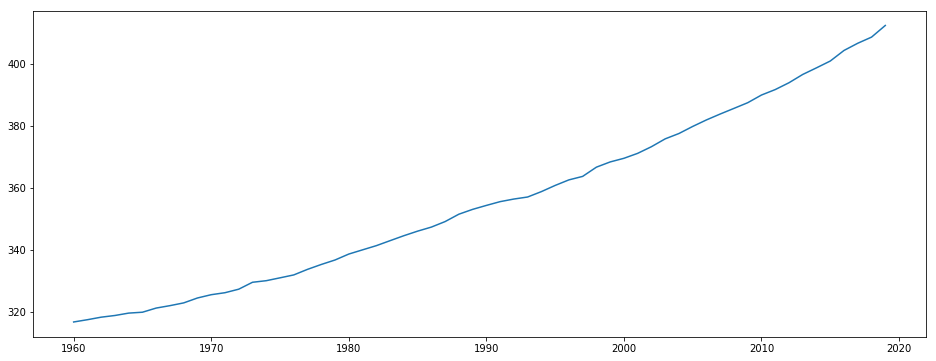

In [110]:
plt.figure(figsize=(16,6))
plt.plot(greenhouse_gas['Year'],greenhouse_gas['Co2_interpolated']);

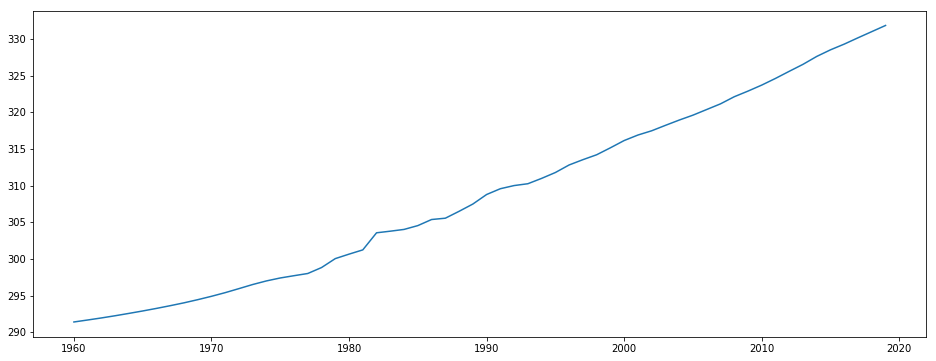

In [109]:
plt.figure(figsize=(16,6))
plt.plot(greenhouse_gas['Year'],greenhouse_gas['n2o_interpolated']);

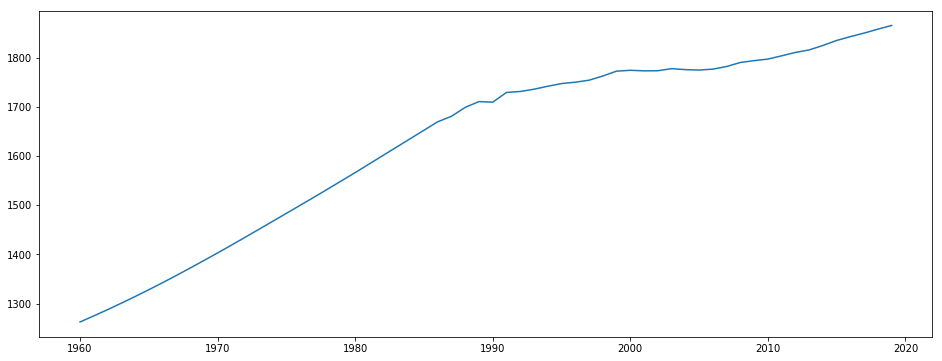

In [111]:
plt.figure(figsize=(16,6))
plt.plot(greenhouse_gas['Year'],greenhouse_gas['ch4_interpolated']);

In [205]:
Main_table=pd.merge(greenhouse_gas,avg_temp,on='Year', how='left')
Main_table.head()

,Year,Month,Co2 (ppm),Co2_interpolated,Entity_x,Code_x,Nitrous Oxide,Entity_y,Code_y,Methane,n2o_interpolated,ch4_interpolated,Anamoly,Temperature
0,1960,6.5,316.907500,316.907500,World,OWID_WRL,291.4,World,OWID_WRL,1262.97,291.40,1262.97,0.009583,14.145417
1,1961,6.5,317.637500,317.637500,NaN,NaN,NaN,NaN,NaN,NaN,291.67,1275.29,0.094167,14.248333
2,1962,6.5,318.450833,318.450833,NaN,NaN,NaN,NaN,NaN,NaN,291.95,1288.01,0.044417,14.250250
3,1963,6.5,318.994167,318.994167,NaN,NaN,NaN,NaN,NaN,NaN,292.25,1301.11,0.085250,14.367750
4,1964,6.5,319.204444,319.760000,NaN,NaN,NaN,NaN,NaN,NaN,292.57,1314.59,-0.185500,14.178667


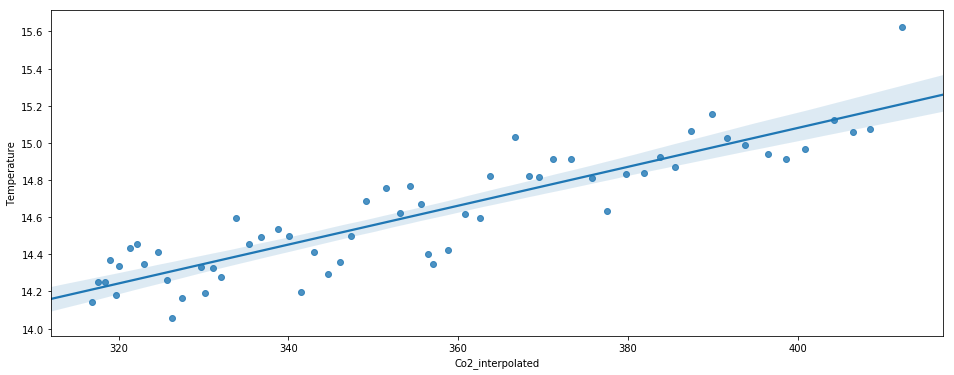

In [129]:
plt.figure(figsize=(16,6))
sns.regplot('Co2_interpolated','Temperature',data=Main_table);

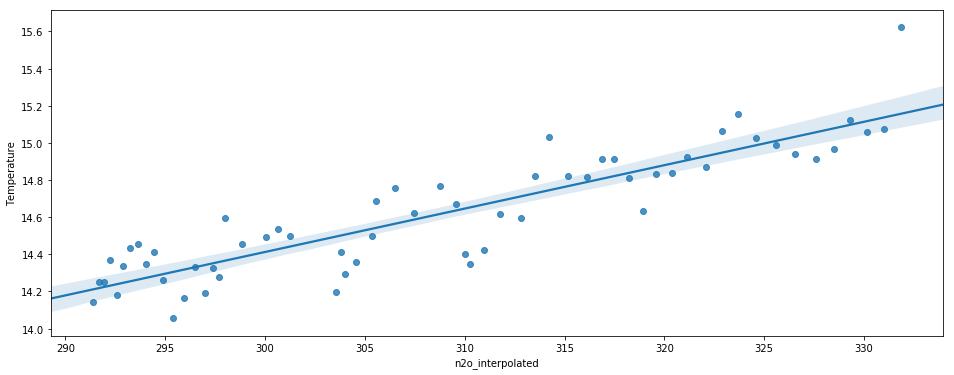

In [131]:
plt.figure(figsize=(16,6))
sns.regplot('n2o_interpolated','Temperature',data=Main_table);

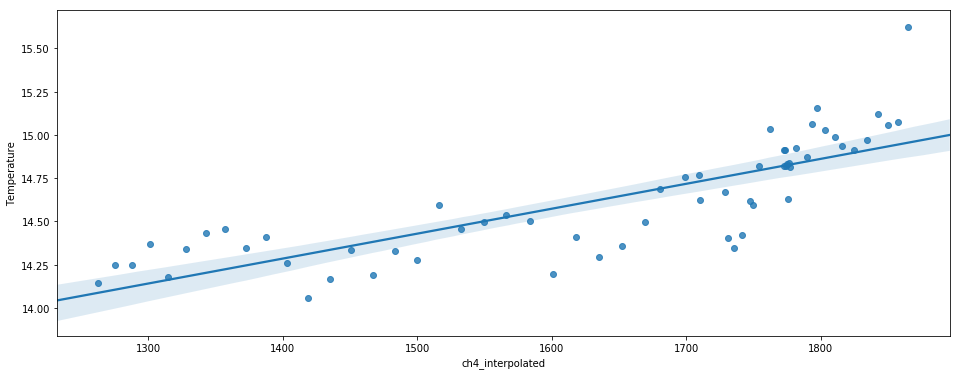

In [133]:
plt.figure(figsize=(16,6))
sns.regplot('ch4_interpolated','Temperature',data=Main_table);

In [164]:
feature_cols=['Co2_interpolated','n2o_interpolated','ch4_interpolated']
target_col='Temperature'
X=Main_table[feature_cols]
y=Main_table[target_col]

In [198]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,random_state=150)

In [199]:
model=LinearRegression(fit_intercept=True)
model.fit(Xtrain,ytrain)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [200]:
model.score(Xtest,ytest)

0.835412886297371

In [223]:
new_set={'Co2_interpolated':400.134455,'n2o_interpolated':320.34,'ch4_interpolated':3401.33}
new_df=pd.DataFrame([new_set])
new_df=new_df[['Co2_interpolated','n2o_interpolated','ch4_interpolated']]
model.predict(new_df)

array([16.11138754])

0.005507250056703494

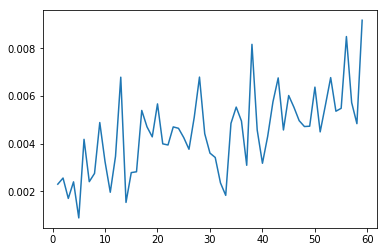

In [235]:
Co2_change=Main_table['Co2_interpolated'].pct_change()
plt.plot(Co2_change);
Co2_change[40:60].median()